In [1]:
import pandas as pd

In [25]:
df = pd.read_json('train_annotations')
df_valid = pd.read_json('valid_annotations')

In [3]:
print(df)

      id  image_id  category_id                  bbox    area segmentation  \
0      0         0            1   [119, 25, 205, 606]  124230           []   
1      1         1            1   [131, 82, 327, 440]  143880           []   
2      2         2            2  [225, 298, 198, 185]   36630           []   
3      3         3            2  [468, 109, 172, 193]   33196           []   
4      4         4            1   [14, 242, 611, 154]   94094           []   
..   ...       ...          ...                   ...     ...          ...   
495  495       495            2   [92, 203, 456, 230]  104880           []   
496  496       496            1  [229, 359, 144, 131]   18864           []   
497  497       497            1  [258, 183, 126, 323]   40698           []   
498  498       498            1   [140, 55, 336, 517]  173712           []   
499  499       499            2   [13, 240, 477, 258]  123066           []   

     iscrowd  
0          0  
1          0  
2          0  
3  

In [4]:
print(df_valid)

    id  image_id  category_id                  bbox    area segmentation  \
0    0         0            1   [227, 93, 298, 525]  156450           []   
1    1         1            2  [211, 198, 428, 259]  110852           []   
2    2         2            2    [0, 243, 512, 267]  136704           []   
3    3         3            1  [128, 178, 457, 354]  161778           []   
4    4         4            1  [168, 131, 296, 469]  138824           []   
..  ..       ...          ...                   ...     ...          ...   
67  67        67            2  [198, 288, 273, 135]   36855           []   
68  68        68            1   [58, 225, 205, 283]   58015           []   
69  69        69            1  [162, 109, 351, 327]  114777           []   
70  70        70            2    [23, 87, 539, 454]  244706           []   
71  71        71            2   [213, 38, 345, 329]  113505           []   

    iscrowd  
0         0  
1         0  
2         0  
3         0  
4         0  
.. 

In [11]:
pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 359.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import json
import os


In [26]:
Id = []

import os
for dirname, _, filenames in os.walk('train/'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]


['train/image_id_213.jpg',
 'train/image_id_082.jpg',
 'train/image_id_442.jpg',
 'train/image_id_136.jpg',
 'train/image_id_465.jpg']

In [27]:
train = pd.DataFrame()
train = train.assign(filename = Id)
train['image_id'] = train['filename'].str.replace('train/image_id_','')
train['image_id'] = train['image_id'].str.replace('.jpg','')
train['image_id'] = train['image_id'].astype(int)
train.head()

/tmp/ipykernel_468/626968969.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train['image_id'] = train['image_id'].str.replace('.jpg','')


,filename,image_id
0,train/image_id_213.jpg,213
1,train/image_id_082.jpg,82
2,train/image_id_442.jpg,442
3,train/image_id_136.jpg,136
4,train/image_id_465.jpg,465


In [28]:
train_data = pd.merge(train,df,on='image_id',how='outer')
train_data = train_data[['filename','category_id']]
train_data.columns = ['filename','label']
train_data.head()

,filename,label
0,train/image_id_213.jpg,2
1,train/image_id_082.jpg,2
2,train/image_id_442.jpg,2
3,train/image_id_136.jpg,1
4,train/image_id_465.jpg,1


In [29]:
train_data['filename'] = train_data['filename'].str.replace('train/','')
train_data.head()

,filename,label
0,image_id_213.jpg,2
1,image_id_082.jpg,2
2,image_id_442.jpg,2
3,image_id_136.jpg,1
4,image_id_465.jpg,1


In [30]:
train_data['label'] = train_data['label'].replace({1:0,2:1})
train_data.head()

,filename,label
0,image_id_213.jpg,1
1,image_id_082.jpg,1
2,image_id_442.jpg,1
3,image_id_136.jpg,0
4,image_id_465.jpg,0


In [31]:
train_data.nunique()

filename    500
label         2
dtype: int64

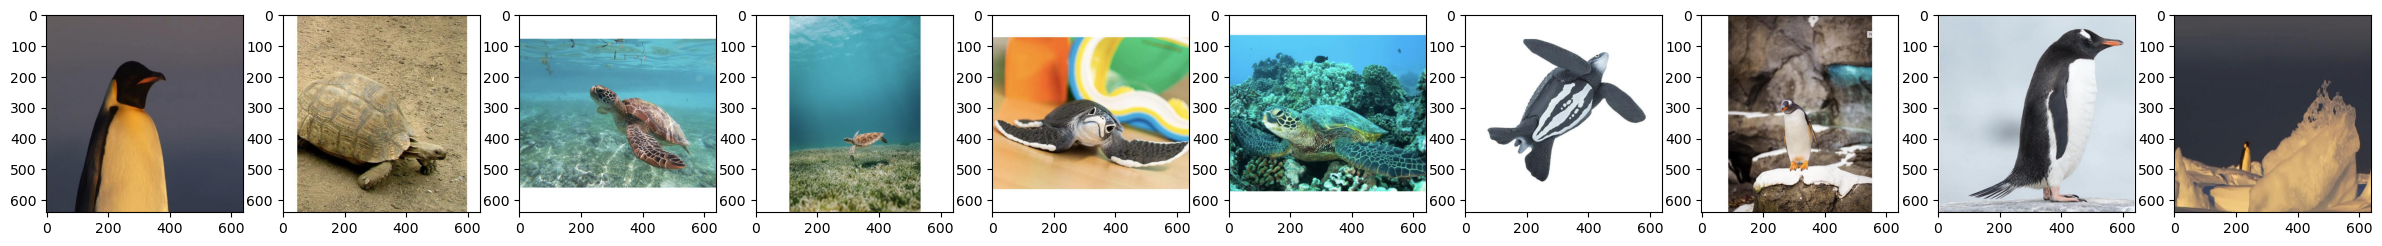

In [35]:
import random
import matplotlib.pyplot as plt 

image_folder_path = 'train/'
image_files = os.listdir(image_folder_path)
num_images = 10

random_image_files = random.sample(image_files, num_images)

fig, axes = plt.subplots(nrows=1, ncols=num_images)
for i, image_file in enumerate(random_image_files):
  image_path = os.path.join(image_folder_path, image_file)
  img = Image.open(image_path)
  axes[i].imshow(img)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.show()